In [7]:
theta = 428
density = 6.022*10**28 # defining the givens
V = 1000
k = 1.38064852*10**(-23)
Tlower = 0.0000001 # Tlower cannot be exactly equal to zero, or we will be dividing by zero
T1, T2 = 5, 500 # we will evaluate the integral for both T = 5 and T = 500 and compare
N = 100 # I will use n = 100 with Simpson's rule

# Let's define the integral function first, and we are going to use Simpson's rule.
import numpy as np
from math import exp
import matplotlib.pyplot as plt
%matplotlib inline
def integral(lower, upper, n, method = 'Rectangle'):
    Sum = 0
    deltaX = (upper - lower)/n
    def f(x):
        numerator = x**4*exp(x)
        denominator = (exp(x) - 1)**2 # at x = 0, this is undefined. So we will integrate from x = .0001 instead of x = 0
        return numerator/denominator 
    
    if method == 'Rectangle':
        x = np.linspace(lower, upper, n)
        for i in x:
            Sum = Sum + f(i)
        area = deltaX*Sum
        return area
    elif method == 'Trapezoid':
        x1 = lower
        x2 = x1 + deltaX
        while x2 <= upper:
            Sum = Sum + (deltaX/2)*(f(x1) + f(x2))
            x1 = x2
            x2 = x1 + deltaX
        return Sum
    elif method == 'Simpson':
        x1 = lower
        x2 = x1 + deltaX
        x3 = x2 + deltaX
        while x3 <= upper:
            Sum = Sum + (deltaX/3)*(f(x1) + 4*f(x2) + f(x3))
            x1 = x3
            x2 = x1 + deltaX
            x3 = x2 + deltaX
        return Sum
    else:
        print('Choose a method from any of the following: Rectangle, Trapezoid, Simpson')
        return None

In [8]:
print("Using Simpson's rule, we get the following calculations:")
print('When T = 5 K, Cv =', 9*V*density*k*((T1/theta)**3)*integral(Tlower, theta/T1, N, 'Simpson'))
print('When T = 500 K, Cv =', 9*V*density*k*((T2/theta)**3)*integral(Tlower, theta/T2, N, 'Simpson'))

Using Simpson's rule, we get the following calculations:
When T = 5 K, Cv = 309894.1210133556
When T = 500 K, Cv = 2267025398.5033855


So the above values were calculated using numerical integration. We will now be integrating the same function using scipy and compare the results with the above results.

In [9]:
from scipy import integrate
constant1, constant2 = 9*V*density*k*(T1/theta)**3, 9*V*density*k*(T2/theta)**3

# redefine the same function
def g(x):
    numerator = (x**4)*exp(x)
    denominator = (exp(x) - 1)**2
    return numerator/denominator
print('Using scipy.integrate.quad, we get the following calculations:')
print('When T = 5 K, Cv =', constant1*integrate.quad(g, Tlower, theta/T1)[0])
print('when T = 500 K, Cv =', constant2*integrate.quad(g, Tlower, theta/T2)[0])

Using scipy.integrate.quad, we get the following calculations:
When T = 5 K, Cv = 309894.10958661174
when T = 500 K, Cv = 2405235622.6381607


As we can see, using the integrate.quad function gives results that are very close to the results obtained by numerical integration. This means that Simpson's rule is very accurate and reliable tool to approximate area under the curve.

Now, let us plot $ C_v $ as a function of $ T $.

In [29]:
def C(t):
    Constant =  9*V*density*k*((t/theta)**3)
    return Constant*integral(Tlower, theta/t, 1000, 'Simpson')

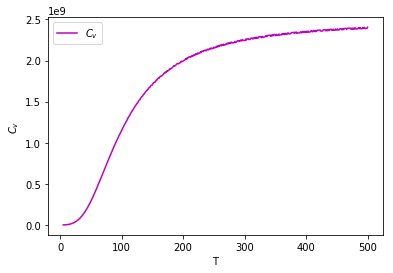

In [38]:
x = np.linspace(5, 500, 496)
y = np.array([C(i) for i in x])
plt.plot(x, y, 'm')
plt.xlabel('T')
plt.ylabel('$C_v$')
plt.legend(['$C_v$'], loc = 'upper left')
plt.show()

Looking at the graph, it seems that $ C_v $ is an increasing function. As $ T $ increases from $ T = 5 $ to $ T = 500 $, $ C_v $ also increases, but it looks like $ C_v $ is approaching a limit(it looks bounded above at a value $ 2.5 $ raised to some power.